In [1]:
## Homework 3 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
data = pd.read_csv('2015_trip_data.csv')
data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0


In [4]:
data['starttime'] = pd.to_datetime(data['starttime'])
data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,2014-10-13 10:32:00,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0


In [5]:
pd.value_counts(data['starttime'].dt.weekday_name)
data['day_of_week'] = data['starttime'].dt.weekday_name
station_from = pd.value_counts(data['from_station_id']).index
station_to = pd.value_counts(data['to_station_id']).index

In [6]:
groupby_dayWeek_from = data.groupby(['from_station_id','day_of_week']).size()/52
from_mean = groupby_dayWeek_from.groupby(level=[0,1]).mean()
from_mean.head()


from_station_id  day_of_week
BT-01            Friday         17.711538
                 Monday         15.500000
                 Saturday       22.076923
                 Sunday         15.500000
                 Thursday       15.403846
dtype: float64

In [7]:
groupby_dayWeek_to = data.groupby(['to_station_id','day_of_week']).size()/52
to_mean = groupby_dayWeek_to.groupby(level=[1]).mean()

In [8]:
df_weekday_counts = pd.DataFrame({'From':groupby_dayWeek_from,'To':groupby_dayWeek_to})
df_weekday_counts = df_weekday_counts.reset_index()
df_weekday_counts.columns = ['Station_id','DayOfWeek','From','To']
df_weekday_counts.head()

,Station_id,DayOfWeek,From,To
0,BT-01,Friday,17.711538,16.346154
1,BT-01,Monday,15.500000,15.153846
2,BT-01,Saturday,22.076923,22.076923
3,BT-01,Sunday,15.500000,16.403846
4,BT-01,Thursday,15.403846,15.230769


In [9]:
diff = df_weekday_counts['From']-df_weekday_counts['To']
diff = pd.DataFrame({'Station_id':df_weekday_counts['Station_id'],'DayOfWeek':df_weekday_counts['DayOfWeek'],'From-To':diff})

In [10]:
mon = diff[diff['DayOfWeek'] == 'Monday']
tue = diff[diff['DayOfWeek'] == 'Tuesday']
wed = diff[diff['DayOfWeek'] == 'Wednesday']
thur = diff[diff['DayOfWeek'] == 'Thursday']
fri = diff[diff['DayOfWeek'] == 'Friday']
sat = diff[diff['DayOfWeek'] == 'Saturday']
sun = diff[diff['DayOfWeek'] == 'Sunday']
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
diff.head()

,DayOfWeek,From-To,Station_id
0,Friday,1.365385,BT-01
1,Monday,0.346154,BT-01
2,Saturday,0.000000,BT-01
3,Sunday,-0.903846,BT-01
4,Thursday,0.173077,BT-01


In [11]:
def draw_bar(df, column, day,opts):
    fig = plt.figure(figsize=(12, 8))
    df1 = df[df['DayOfWeek']==day]
    n_groups = len(df1[column])
    index = np.arange(n_groups)
    plt.bar(index, df1[column])
    if 'xlabel' in opts.keys():
      plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts.keys():
      plt.ylabel(opts['ylabel'])
    if 'xticks' in opts.keys() and opts['xticks']:
      plt.xticks(index, df1['Station_id'])  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df1.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts.keys():
      plt.ylim(opts['ylim'])
    plt.title(day)
    plt.show()
    

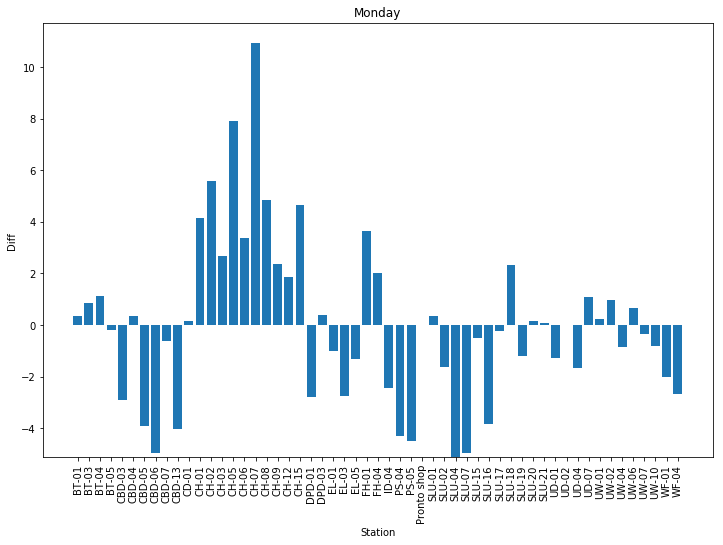

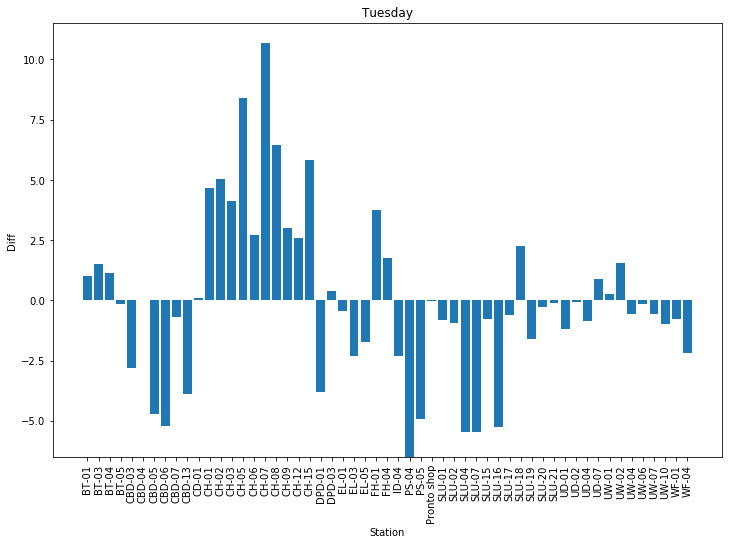

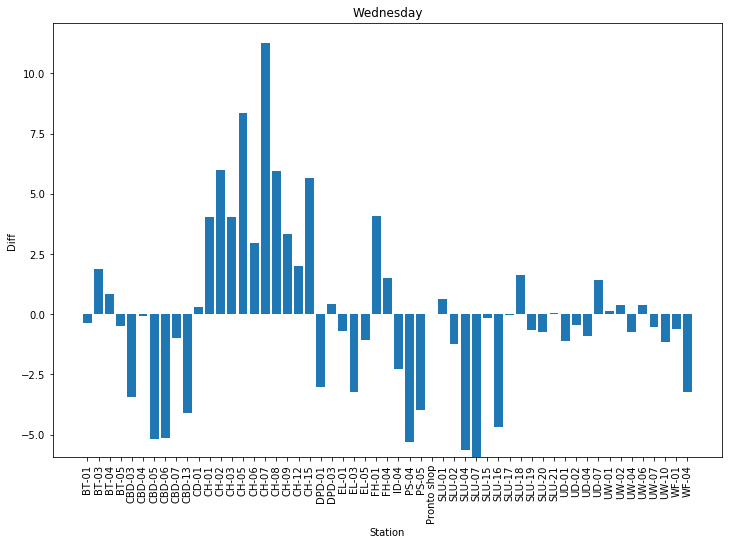

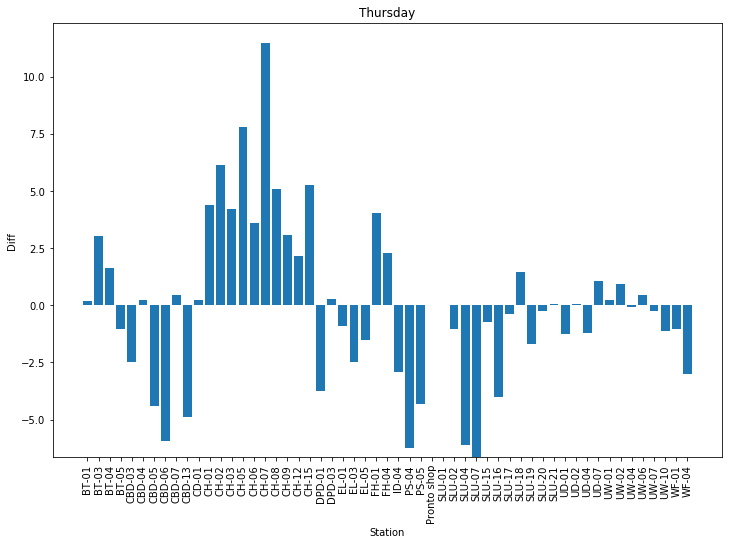

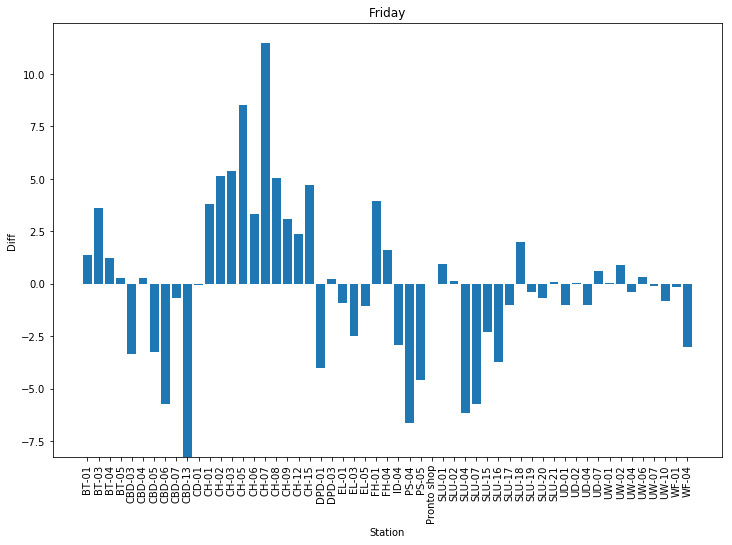

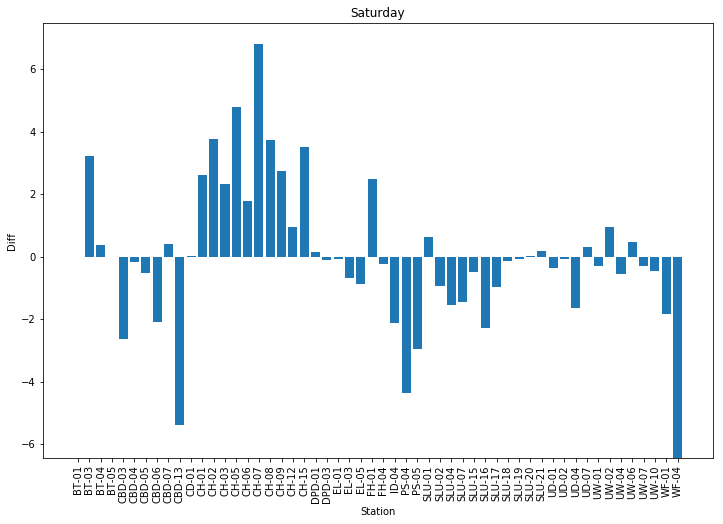

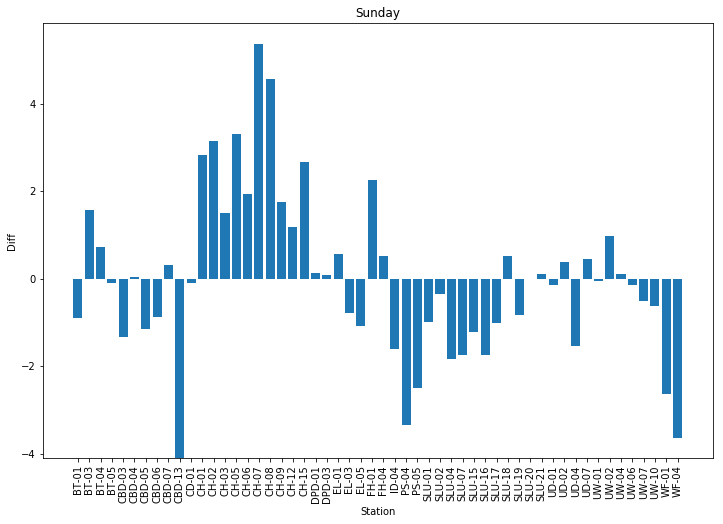

In [12]:
optss = {'xticks':True, 'xlabel':'Station','ylabel':'Diff'}
count = 0
for i in week:
    count += 1
    draw_bar(diff,"From-To",i,optss)